In [105]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [106]:
df_customers = pd.read_csv('customers.csv')
df_loans = pd.read_csv('loans.csv')
df_bureau = pd.read_csv('bureau_data.csv')

In [107]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [108]:
df_customers.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001


In [109]:
df_loans.head(3)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [110]:
df_bureau.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58


In [111]:
df = pd.merge(df_customers, df_loans, on='cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [112]:
df = pd.merge(df, df_bureau, on='cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [114]:
df['default'] = df['default'].astype(int)

In [115]:
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [116]:
X = df.drop('default', axis='columns')
y = df['default']

X_train,X_test,y_train,y_test=train_test_split(X,y, stratify=y, test_size=0.25, random_state=42)

df_train = pd.concat([X_train, y_train], axis='columns')
df_test = pd.concat([X_test, y_test], axis='columns')

In [117]:
df_train.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0


In [118]:
df_test.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
19205,C19206,36,M,Married,Self-Employed,3728000,3,Owned,24,Jaipur,...,2021-06-24,2021-07-23,2,1,42,0,0,5,98,0
15514,C15515,43,F,Single,Self-Employed,2493000,0,Owned,23,Delhi,...,2021-02-09,2021-02-18,4,0,125,0,0,5,32,0
30367,C30368,30,M,Married,Self-Employed,3114000,4,Owned,27,Delhi,...,2022-08-06,2022-08-21,3,0,76,0,0,6,82,0


In [119]:
df_train.shape, df_test.shape

((37500, 33), (12500, 33))

### Handling Misiing Values

In [120]:
df_train.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [121]:
df.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [122]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [123]:
df_train.residence_type.fillna(mode_residence, inplace=True)
df_train.residence_type.unique()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9056\2089477585.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence, inplace=True)


array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [124]:
df_test.fillna({'residence_type': mode_residence}, inplace=True)

### Duplicated Values

In [125]:
df_train.duplicated().sum()

np.int64(0)

### Check for Numeric columns and categorical columns

In [126]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [127]:
# Categorical features (object dtype or categorical in nature)
categorical_cols = [
    'gender', 'marital_status', 'employment_status',
    'residence_type', 'city', 'state', 'zipcode',
    'loan_purpose', 'loan_type', 'default'
]

# Numeric features (int64 or float64 and truly numerical)
numeric_cols = [
    'age', 'income', 'number_of_dependants', 'years_at_current_address',
    'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
    'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
    'bank_balance_at_application', 'number_of_open_accounts',
    'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
    'total_dpd', 'enquiry_count', 'credit_utilization_ratio'
]

### Handling Outliers

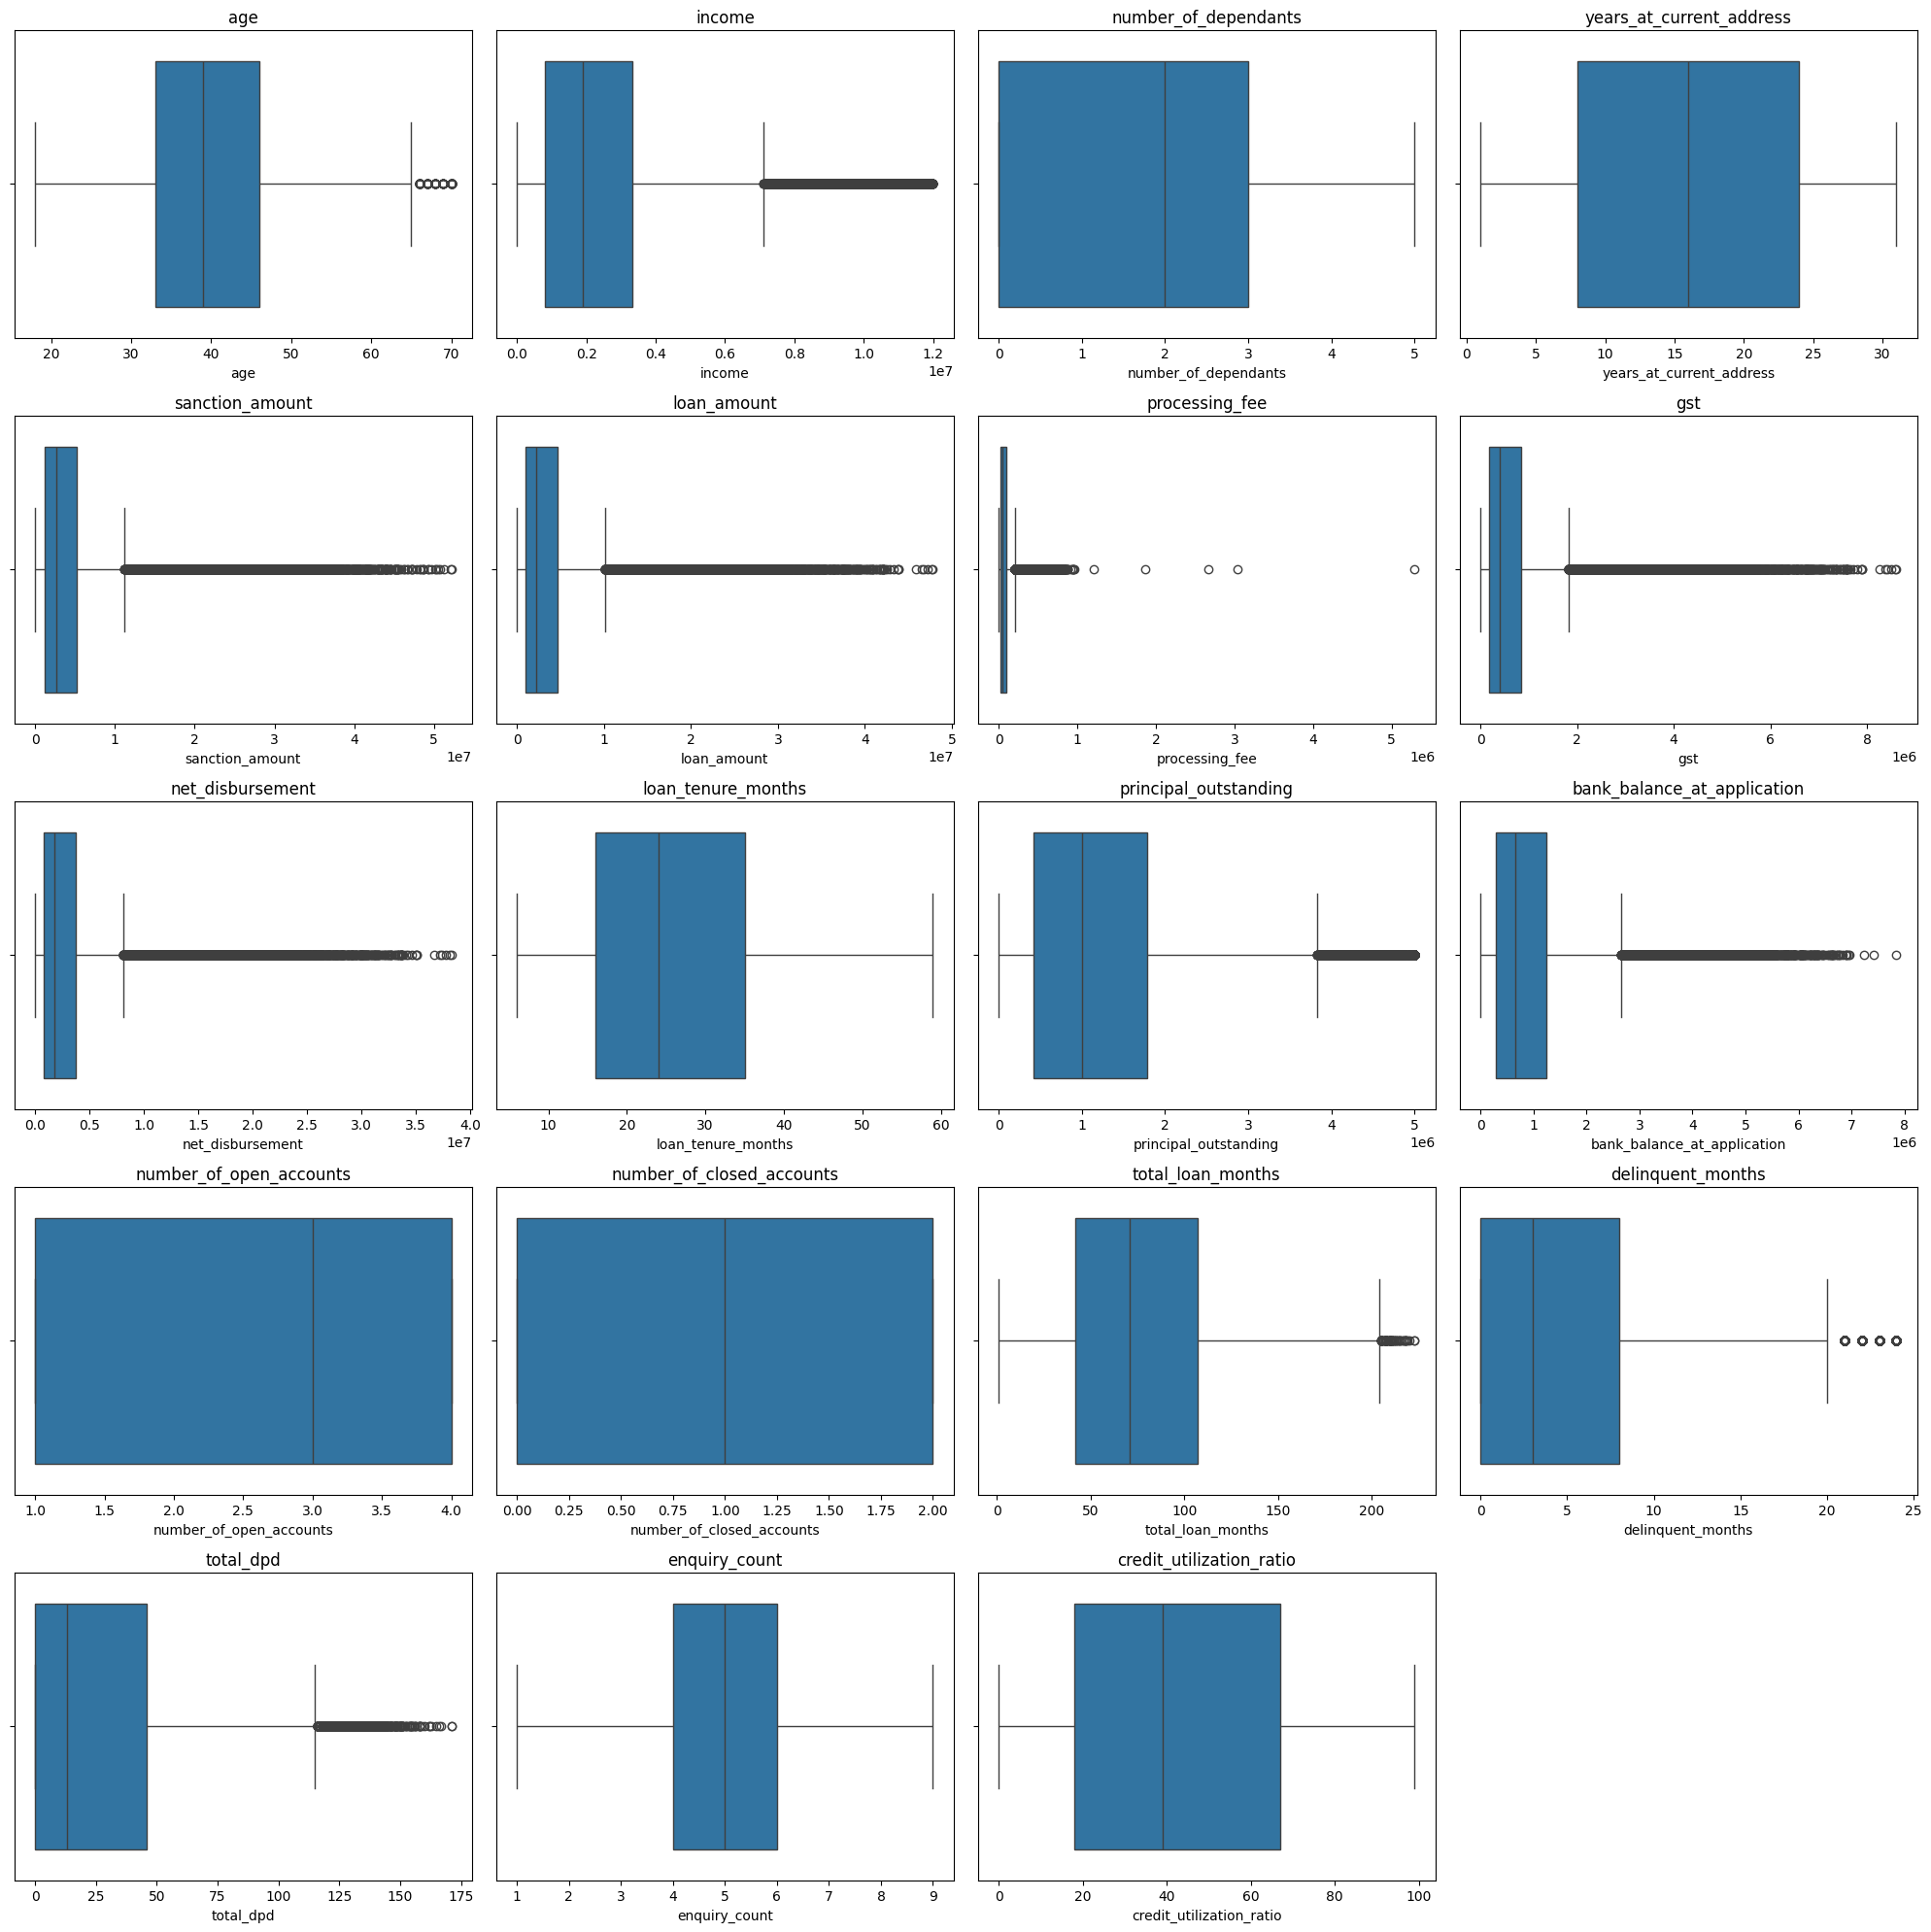

In [128]:
# Define number of plots per row
plots_per_row = 4

# Calculate total rows needed
total_plots = len(numeric_cols)
n_rows = (total_plots + plots_per_row - 1) // plots_per_row

# Set figure size dynamically
fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(5 * plots_per_row, 4 * n_rows))
axes = axes.flatten()

# Plot each boxplot horizontally
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df_train[col], ax=axes[i])  # horizontal plot
    axes[i].set_title(col)
    axes[i].set_ylabel("")  # optional: remove y-axis label

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

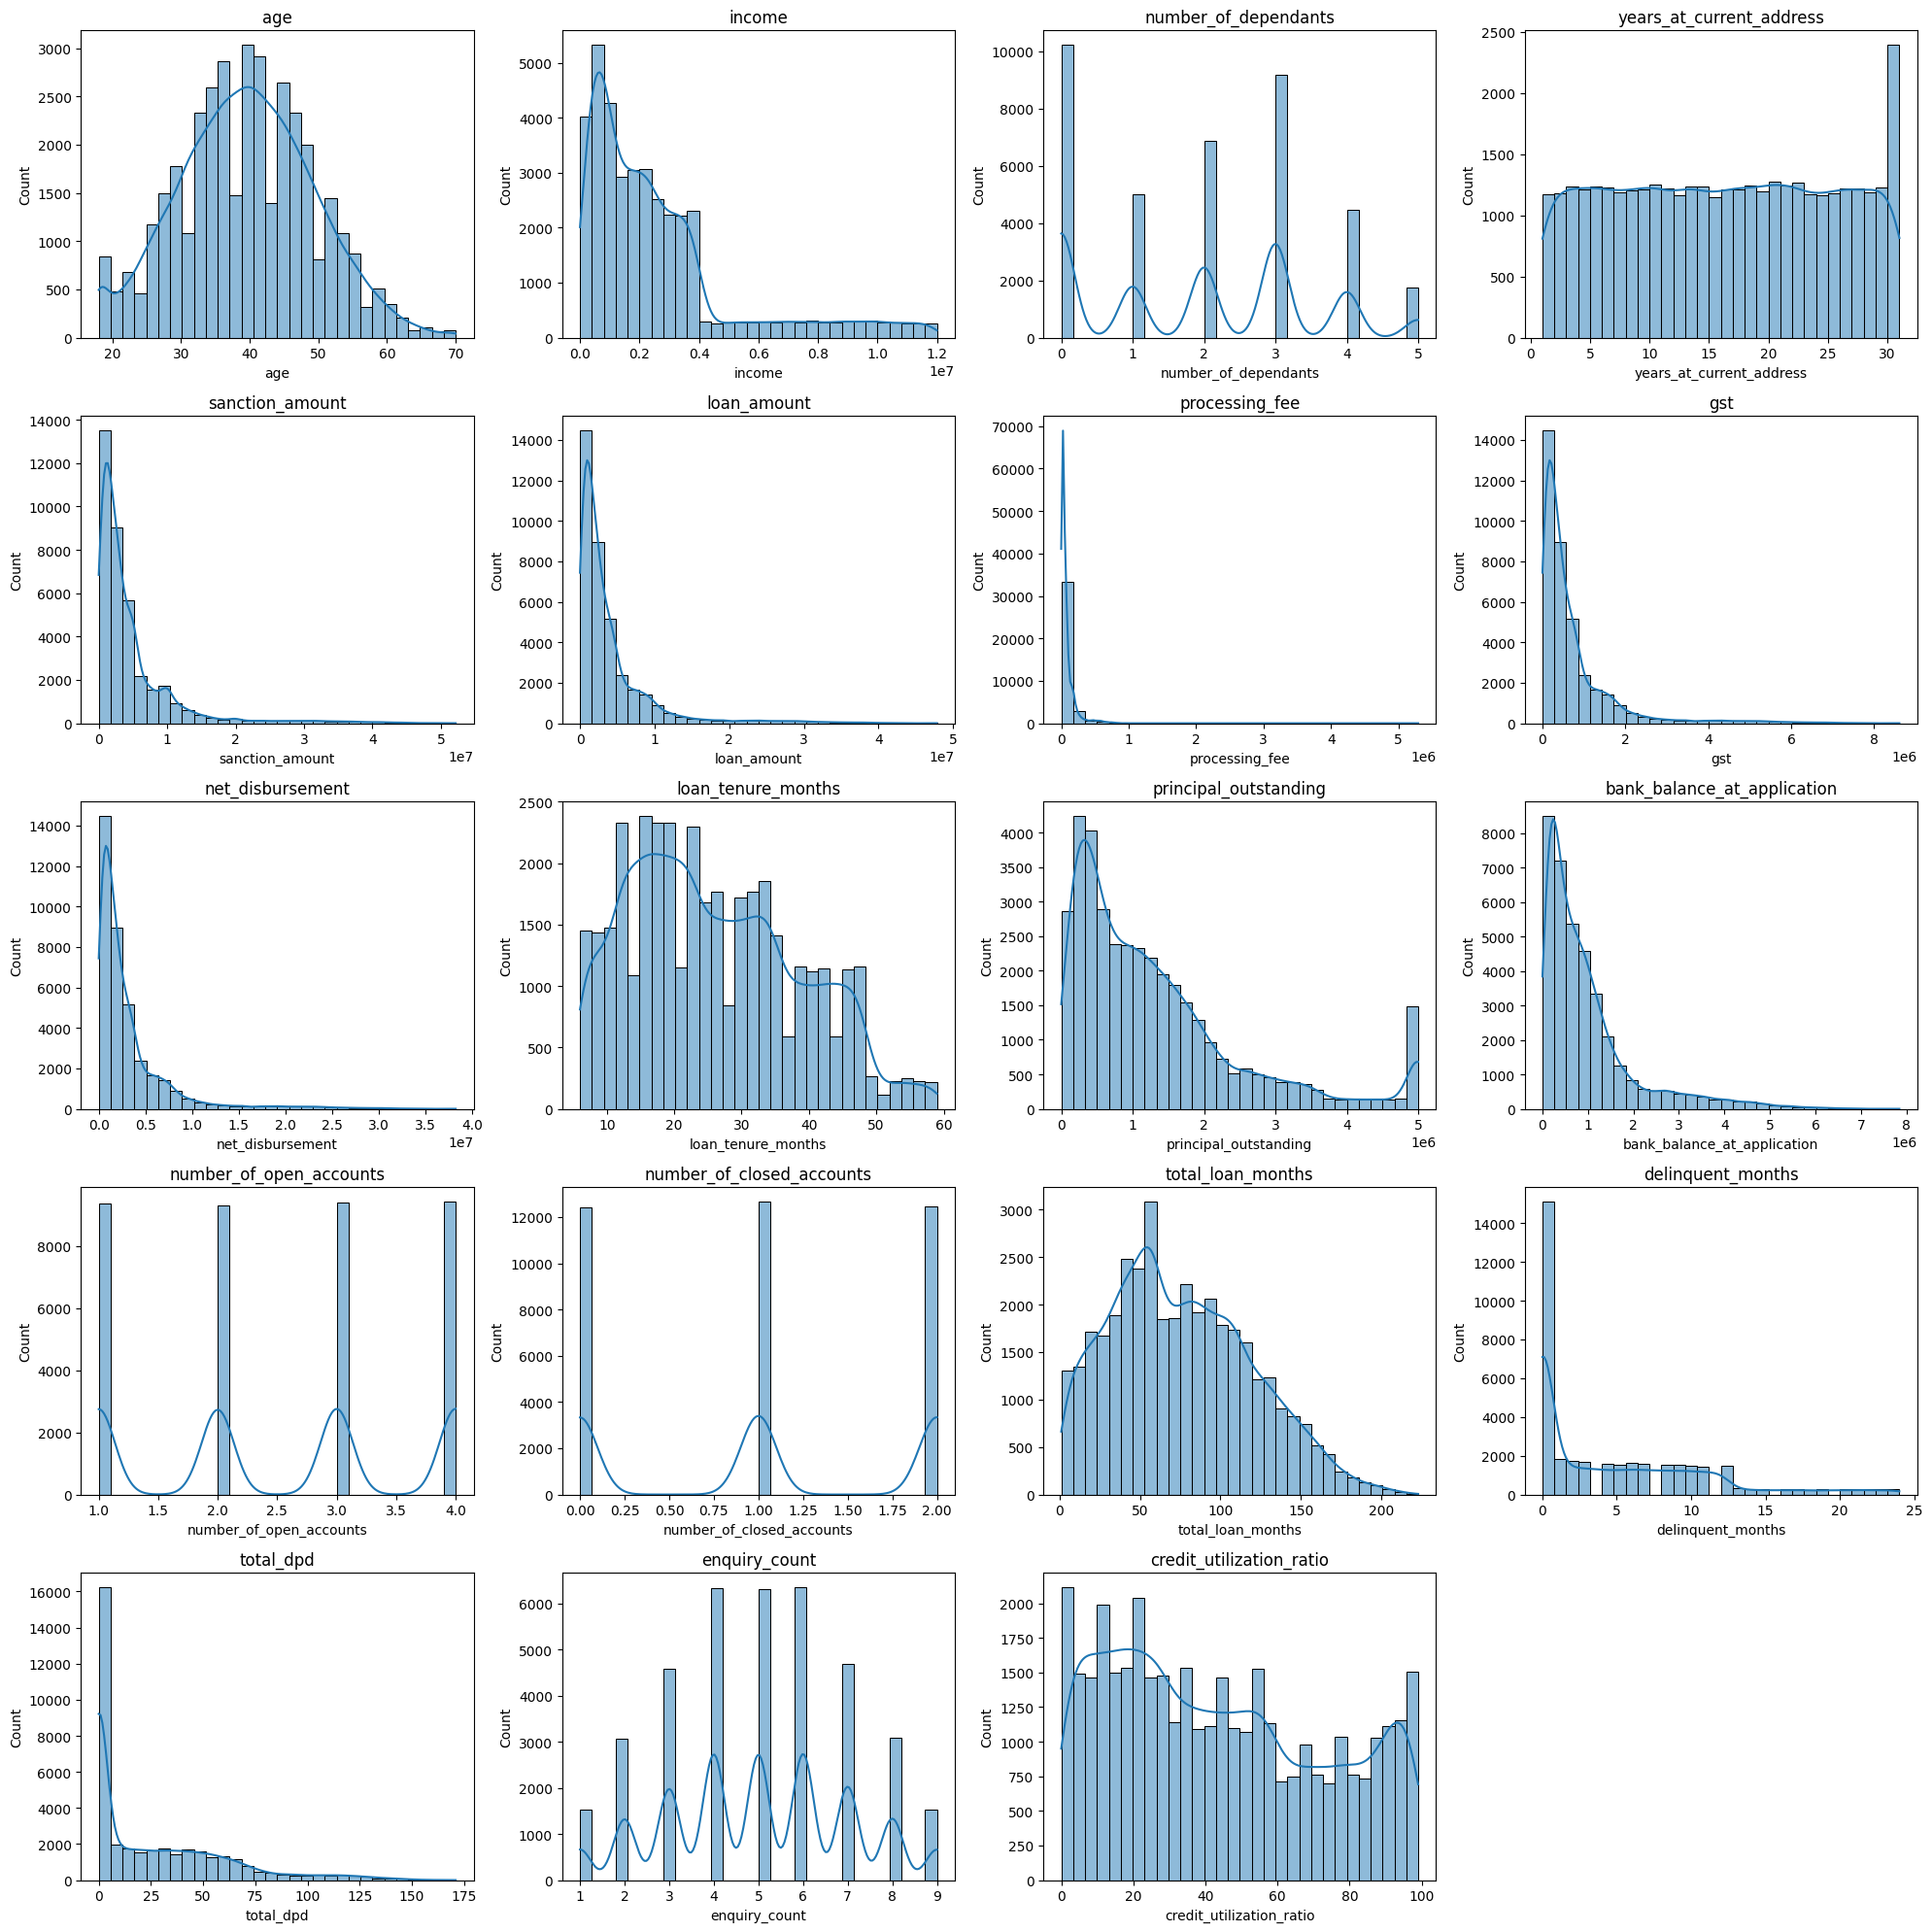

In [129]:
# How many plots per row
plots_per_row = 4

# Calculate total rows needed
total_plots = len(numeric_cols)
n_rows = (total_plots + plots_per_row - 1) // plots_per_row

# Set figure size (width * columns, height * rows)
fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(5 * plots_per_row, 4 * n_rows))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df_train, x=col, kde=True, ax=axes[i], bins=30)
    axes[i].set_title(col)

# Remove extra empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [130]:
df_train['processing_fee'] = df_train['processing_fee'].astype(int)

In [131]:
df_train.processing_fee.describe()

count    3.750000e+04
mean     8.029068e+04
std      1.131281e+05
min      0.000000e+00
25%      1.922000e+04
50%      4.460000e+04
75%      9.242000e+04
max      5.293543e+06
Name: processing_fee, dtype: float64

In [132]:
df_train[df_train.processing_fee==df_train.processing_fee.max()]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
9898,C09899,56,M,Married,Self-Employed,8948000,5,Owned,16,Ahmedabad,...,2020-07-19,2020-08-11,2,1,51,1,5,3,92,0


In [133]:
df_train[df_train.processing_fee==df_train.processing_fee.max()][["loan_amount", "processing_fee"]]

,loan_amount,processing_fee
9898,3626000,5293543


In [134]:
df_train[df_train.processing_fee>df_train.loan_amount][["loan_amount", "processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2669791
28174,966000,1214492
47089,1738000,1858964
29305,2616000,3036378
9898,3626000,5293543


In [135]:
df_train[(df_train.processing_fee/df_train.loan_amount)>0.03][["loan_amount", "processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2669791
28174,966000,1214492
47089,1738000,1858964
29305,2616000,3036378
9898,3626000,5293543


In [136]:
 df_train_1 = df_train[(df_train.processing_fee/df_train.loan_amount)<0.03].copy()

In [137]:
df_test = df_test[df_test.processing_fee/df_test.loan_amount<0.03].copy()
df_test.shape

(12497, 33)

In [138]:
categorical_cols

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [139]:
for col in categorical_cols:
    print(col, "--", df_train[col].unique())

gender -- ['M' 'F']
marital_status -- ['Married' 'Single']
employment_status -- ['Self-Employed' 'Salaried']
residence_type -- ['Owned' 'Mortgage' 'Rented']
city -- ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state -- ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode -- [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose -- ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type -- ['Secured' 'Unsecured']
default -- [0 1]


In [140]:
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal', 'Personal')
df_test['loan_purpose'] = df_test['loan_purpose'].replace('Personaal', 'Personal')
df_train_1.loan_purpose.unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

<h3 align="center" style="color:blue">Exploratory Data Analysis </h3>

In [141]:
numeric_cols

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

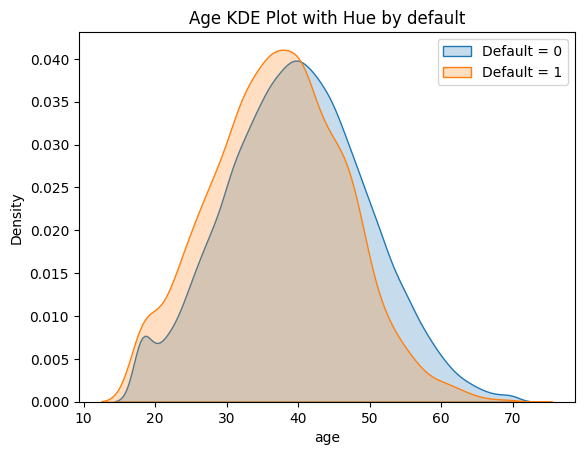

In [142]:
sns.kdeplot(df_train[df_train.default == 0]['age'], fill=True, label='Default = 0')
sns.kdeplot(df_train[df_train.default == 1]['age'], fill=True, label='Default = 1')

plt.title("Age KDE Plot with Hue by default")
plt.legend()
plt.show()

Insights 
1. Orange graph is little bit shifted to the left of blue graph which indicates that people with young age are more likely to default

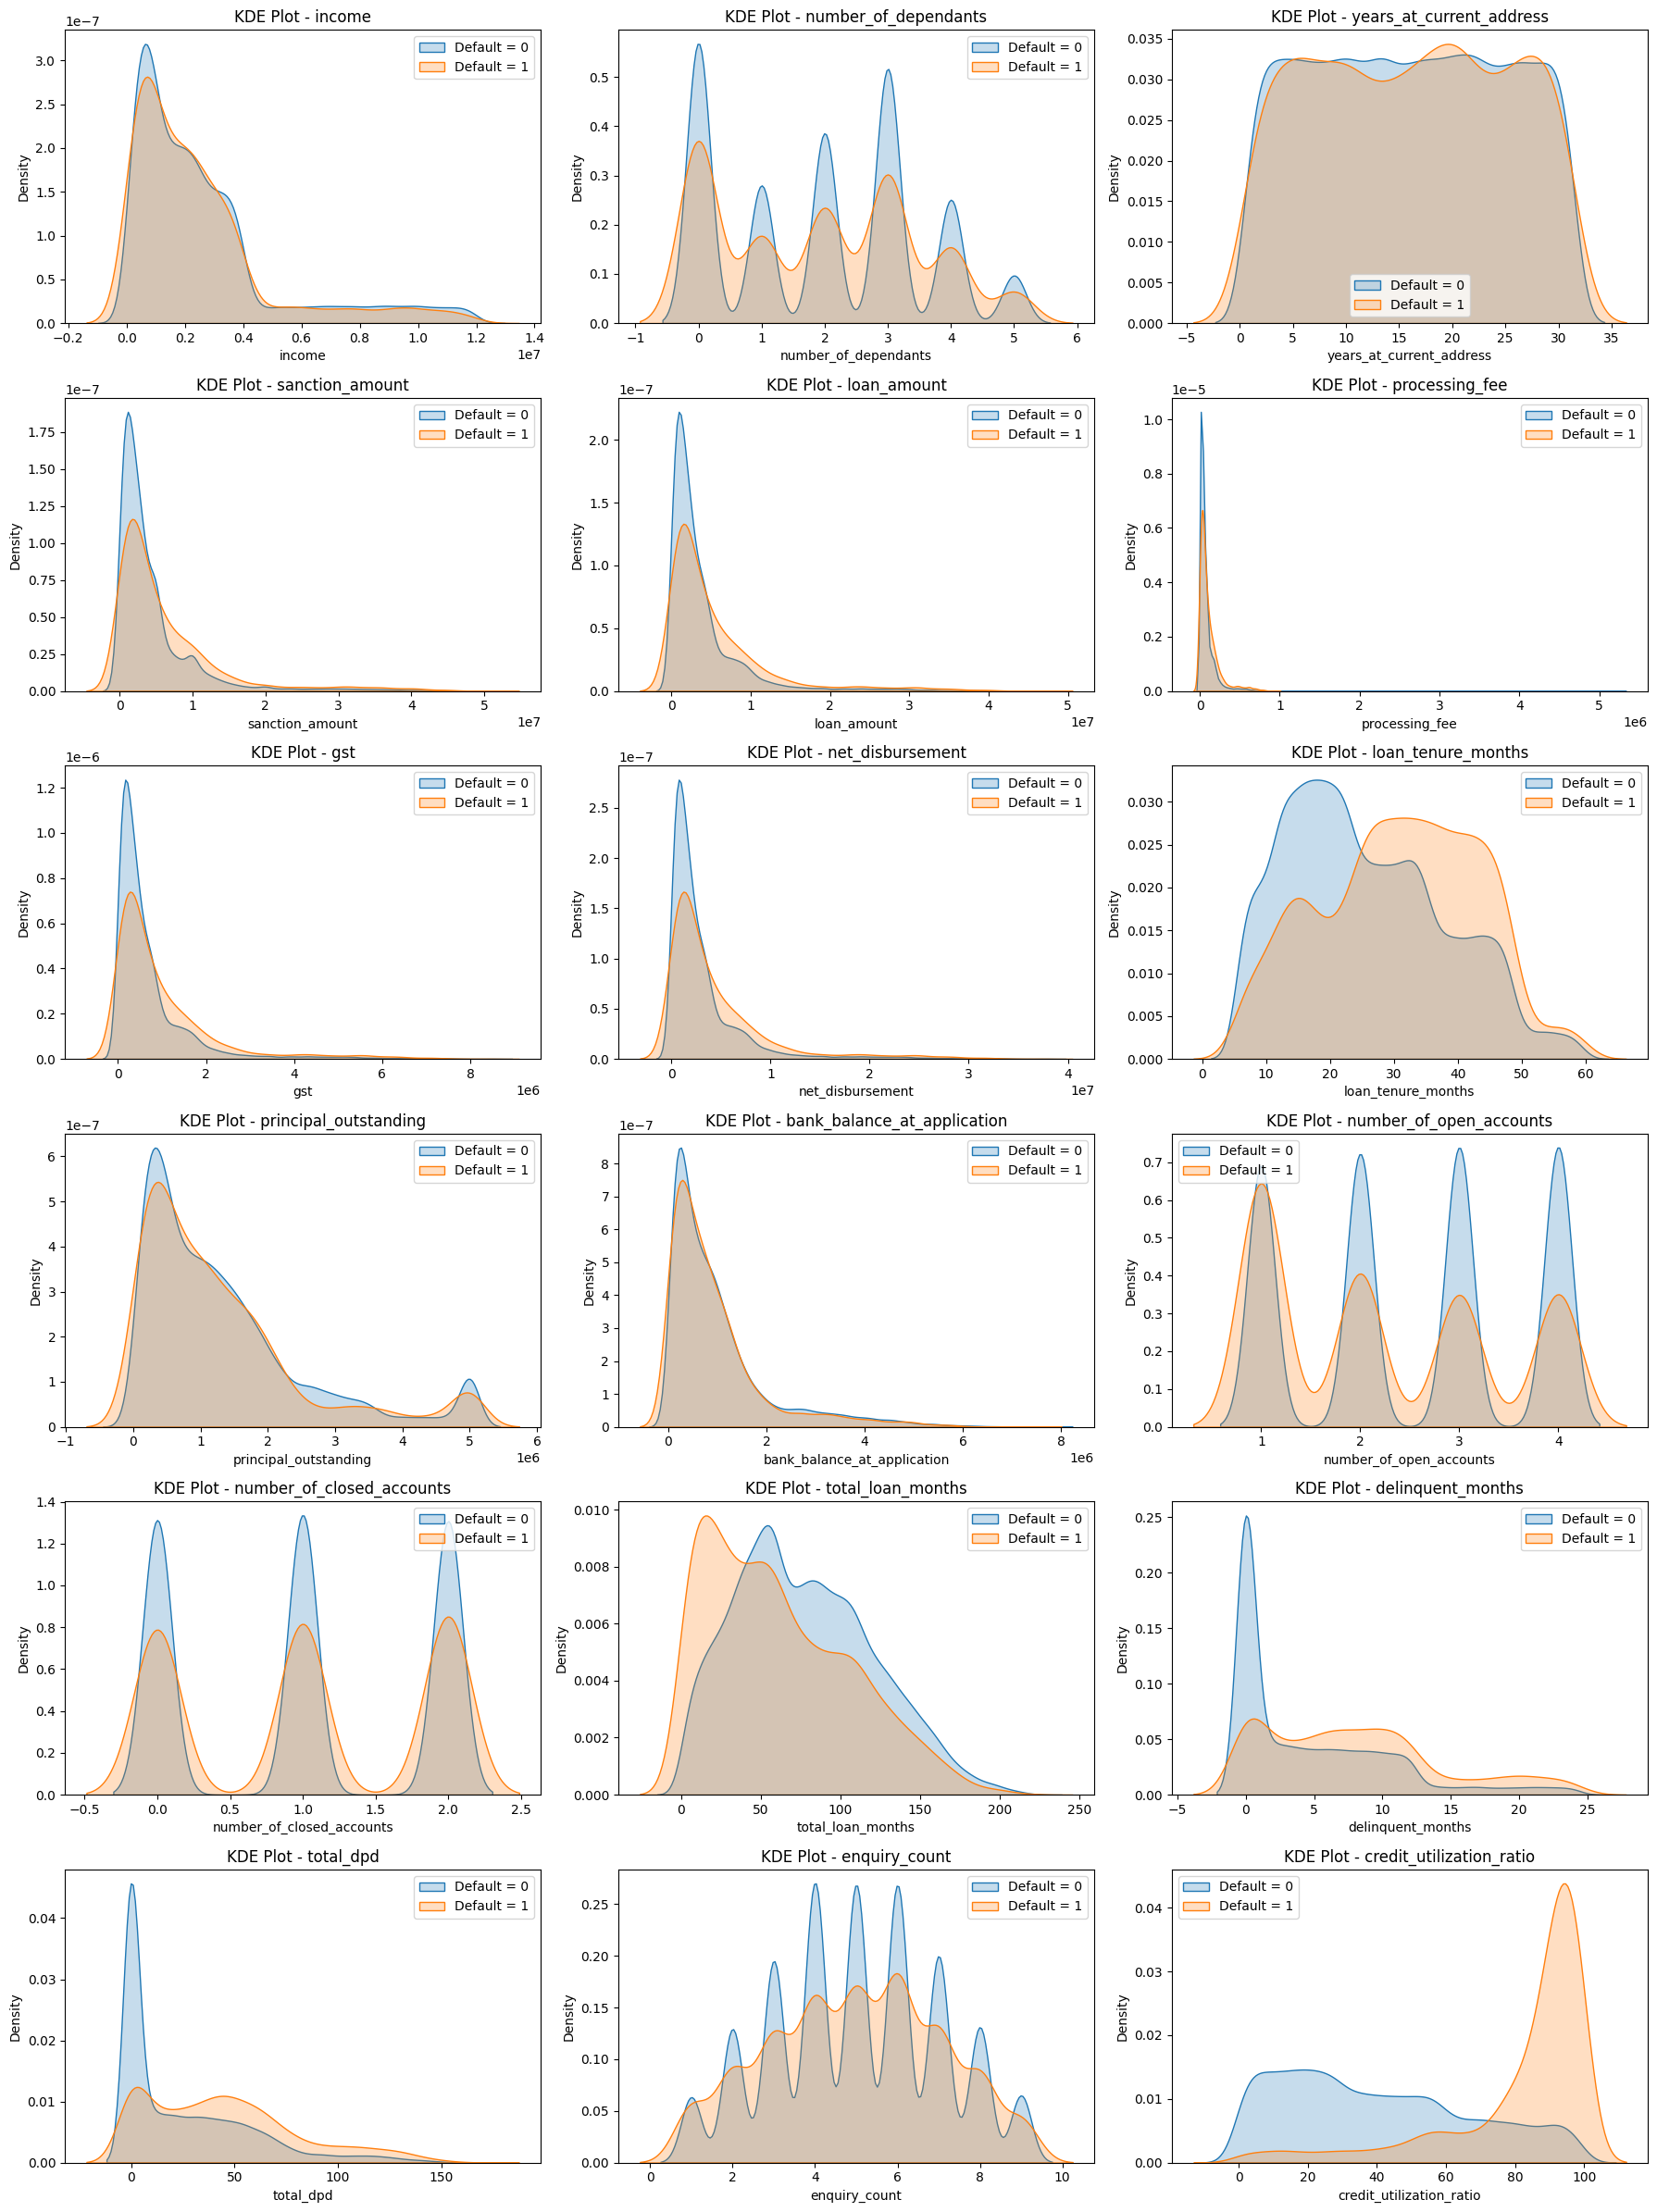

In [143]:
# Exclude 'age' since you've already plotted it
cols_to_plot = [col for col in numeric_cols if col != 'age']

# Plot settings
plots_per_row = 3
total_plots = len(cols_to_plot)
n_rows = (total_plots + plots_per_row - 1) // plots_per_row

# Create subplots
fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(6 * plots_per_row, 4 * n_rows))
axes = axes.flatten()

# Loop through and plot KDEs
for i, col in enumerate(cols_to_plot):
    sns.kdeplot(df_train[df_train.default == 0][col], fill=True, label='Default = 0', ax=axes[i])
    sns.kdeplot(df_train[df_train.default == 1][col], fill=True, label='Default = 1', ax=axes[i])
    axes[i].set_title(f"KDE Plot - {col}")
    axes[i].legend()

# Hide unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Insights
1. In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelihood of becoming a default. Hence these 4 look like strong predictors.
2. In remaining columns the distributions do not give any obvious insights.
3. Why loan_amount and income did not give any signs of being strong predictors? Maybe when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable. We will explore more later.

<h3 align="center" style="color:blue">Feature Engineering </h3>

In [144]:
df_train_1[['loan_amount', 'income']]

,loan_amount,income
12746,23442000,11327000
32495,1149000,715000
43675,11296000,3195000
9040,1695000,1500000
13077,905000,1817000
...,...,...
28515,1420000,2470000
5558,2753000,2472000
45236,4479000,1329000
49228,1890000,1274000


In [145]:
df_train_1['loan_to_income'] = round(df_train_1['loan_amount']/df_train_1['income'], 2)
df_train_1['loan_to_income'].describe()

count    37488.000000
mean         1.556711
std          0.973687
min          0.300000
25%          0.770000
50%          1.160000
75%          2.460000
max          4.570000
Name: loan_to_income, dtype: float64

In [146]:
df_test['loan_to_income'] = round(df_test['loan_amount']/df_test['income'], 2)

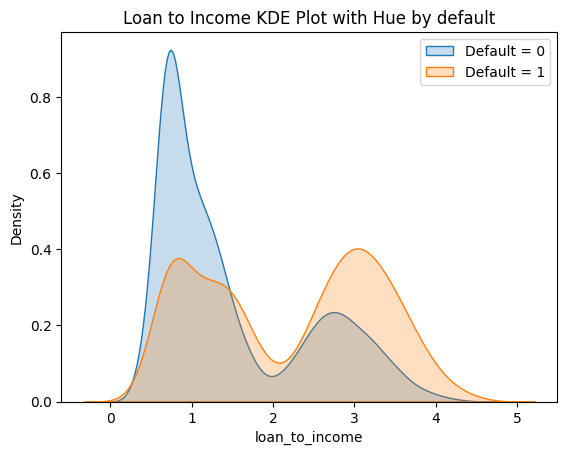

In [147]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['loan_to_income'], fill=True, label='Default = 0')
sns.kdeplot(df_train_1[df_train_1.default == 1]['loan_to_income'], fill=True, label='Default = 1')

plt.title("Loan to Income KDE Plot with Hue by default")
plt.legend()
plt.show()

In [148]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income'],
      dtype='object')

In [149]:
df_train_1[['delinquent_months', 'total_loan_months']]

,delinquent_months,total_loan_months
12746,20,152
32495,10,160
43675,12,54
9040,0,76
13077,0,60
...,...,...
28515,0,40
5558,14,52
45236,11,130
49228,0,88


In [150]:
df_train_1['delinquency_ratio']= round(df_train_1['delinquent_months']*100 / df_train_1['total_loan_months'], 2)
df_train_1[['delinquent_months', 'total_loan_months', 'delinquency_ratio']]

,delinquent_months,total_loan_months,delinquency_ratio
12746,20,152,13.16
32495,10,160,6.25
43675,12,54,22.22
9040,0,76,0.00
13077,0,60,0.00
...,...,...,...
28515,0,40,0.00
5558,14,52,26.92
45236,11,130,8.46
49228,0,88,0.00


In [151]:
df_test['delinquency_ratio']= round(df_test['delinquent_months']*100 / df_test['total_loan_months'], 2)

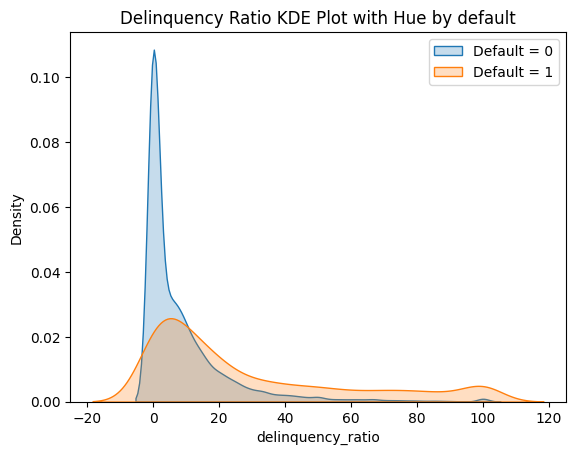

In [152]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['delinquency_ratio'], fill=True, label='Default = 0')
sns.kdeplot(df_train_1[df_train_1.default == 1]['delinquency_ratio'], fill=True, label='Default = 1')

plt.title("Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

In [153]:
df_train_1['avg_dpd_per_delinquency'] = round(df_train_1['total_dpd']/ df_train_1['delinquent_months'],1)
df_train_1['avg_dpd_per_delinquency'].describe()

count    22400.000000
mean         5.495866
std          1.407949
min          1.000000
25%          4.700000
50%          5.500000
75%          6.300000
max         10.000000
Name: avg_dpd_per_delinquency, dtype: float64

In [154]:
df_train_1['avg_dpd_per_delinquency'].isna().sum()

np.int64(15088)

In [155]:
df_train_1['avg_dpd_per_delinquency']=np.where(
     df_train_1['delinquent_months']!=0,
     round(df_train_1['total_dpd']/ df_train_1['delinquent_months'],1),
     0
)
df_train_1['avg_dpd_per_delinquency'].isna().sum()

np.int64(0)

In [156]:
df_train_1['avg_dpd_per_delinquency'].describe()

count    37488.000000
mean         3.283915
std          2.906633
min          0.000000
25%          0.000000
50%          4.300000
75%          5.725000
max         10.000000
Name: avg_dpd_per_delinquency, dtype: float64

In [157]:
df_test['avg_dpd_per_delinquency']=np.where(
     df_test['delinquent_months']!=0,
     round(df_test['total_dpd']/ df_test['delinquent_months'],1),
     0
)

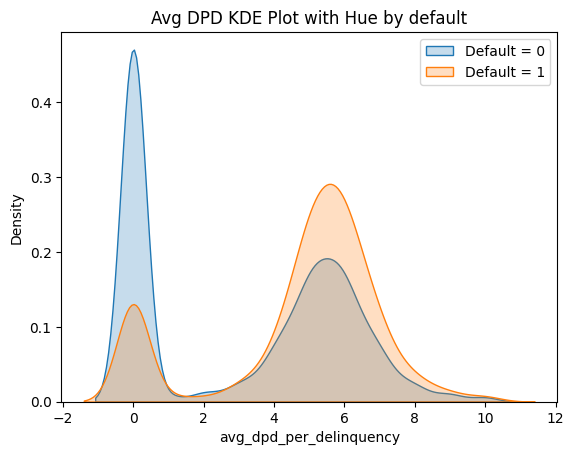

In [158]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['avg_dpd_per_delinquency'], fill=True, label='Default = 0')
sns.kdeplot(df_train_1[df_train_1.default == 1]['avg_dpd_per_delinquency'], fill=True, label='Default = 1')

plt.title("Avg DPD KDE Plot with Hue by default")
plt.legend()
plt.show()

In [159]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

### Feature Selection 


In [160]:
df_train_2 = df_train_1.drop(['cust_id', 'loan_id'], axis='columns')
df_test = df_test.drop(['cust_id', 'loan_id'], axis='columns')

In [161]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 'total_loan_months', 'delinquent_months', 'total_dpd'], axis='columns')
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 'total_loan_months', 'delinquent_months', 'total_dpd'], axis='columns')

In [162]:
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [163]:
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 12746 to 37784
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37488 non-null  int64  
 1   gender                       37488 non-null  object 
 2   marital_status               37488 non-null  object 
 3   employment_status            37488 non-null  object 
 4   number_of_dependants         37488 non-null  int64  
 5   residence_type               37488 non-null  object 
 6   years_at_current_address     37488 non-null  int64  
 7   city                         37488 non-null  object 
 8   state                        37488 non-null  object 
 9   zipcode                      37488 non-null  int64  
 10  loan_purpose                 37488 non-null  object 
 11  loan_type                    37488 non-null  object 
 12  sanction_amount              37488 non-null  int64  
 13  processing_fee   

In [164]:
df_train_3.select_dtypes(['int64', 'float64']).drop(columns='default').columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [165]:
X_train = df_train_3.drop('default', axis='columns')
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = df_train_3.select_dtypes(['int64', 'float64']).drop(columns='default').columns

scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.00000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000
mean,0.414240,0.388903,0.499918,0.523517,0.088840,0.082513,0.082513,0.082513,0.376631,0.261615,0.123550,0.500925,0.50056,0.501077,0.438653,0.294312,0.103300,0.328391
std,0.189590,0.307182,0.297364,0.286491,0.120117,0.112480,0.112480,0.112480,0.234860,0.244461,0.133275,0.373040,0.40701,0.253666,0.296902,0.228030,0.172983,0.290663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.020555,0.018963,0.018963,0.018963,0.188679,0.077988,0.034205,0.000000,0.00000,0.375000,0.181818,0.110070,0.000000,0.000000
50%,0.403846,0.400000,0.500000,0.491525,0.049364,0.045516,0.045516,0.045516,0.339623,0.193870,0.082515,0.666667,0.50000,0.500000,0.393939,0.201405,0.036800,0.430000
75%,0.538462,0.600000,0.766667,0.762712,0.098027,0.095555,0.095555,0.095555,0.547170,0.352418,0.155192,1.000000,1.00000,0.625000,0.676768,0.505855,0.129500,0.572500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [166]:
X_test = df_test.drop('default', axis='columns')
y_test = df_test['default']

cols_to_scale = df_test.select_dtypes(['int64', 'float64']).drop(columns='default').columns

scaler = MinMaxScaler()
X_test[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000
mean,0.415001,0.384892,0.502697,0.525015,0.090941,0.086037,0.086037,0.086037,0.375092,0.264512,0.132421,0.497293,0.500440,0.501470,0.436038,0.291672,0.106077,0.333844
std,0.188773,0.306871,0.298103,0.286179,0.123151,0.117111,0.117111,0.117111,0.233792,0.245330,0.143538,0.372576,0.407226,0.253618,0.295418,0.225122,0.173082,0.289680
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.021378,0.020245,0.020245,0.020245,0.188679,0.079565,0.035694,0.000000,0.000000,0.375000,0.181818,0.111888,0.000000,0.000000
50%,0.423077,0.400000,0.500000,0.510169,0.051167,0.048115,0.048115,0.048115,0.339623,0.198108,0.088820,0.333333,0.500000,0.500000,0.393939,0.200466,0.042100,0.440000
75%,0.538462,0.600000,0.766667,0.762712,0.099302,0.098618,0.098618,0.098618,0.547170,0.356809,0.167423,0.666667,1.000000,0.625000,0.676768,0.496503,0.133900,0.580000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    # Ensure numeric dtype only
    data = data.select_dtypes(include=[np.number])
    
    # Drop rows with NaN or inf values
    data = data.replace([np.inf, -np.inf], np.nan).dropna()

    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [168]:
calculate_vif(X_train)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.700668
1,number_of_dependants,2.730311
2,years_at_current_address,3.422577
3,zipcode,3.797522
4,sanction_amount,101.086561
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.180522
9,principal_outstanding,16.326467


In [169]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement', 'principal_outstanding']

X_train_1 = X_train.drop(features_to_drop_vif, axis='columns')
numeric_columns = X_train_1.select_dtypes(['int64', 'float64'])
numeric_columns

,age,number_of_dependants,years_at_current_address,zipcode,loan_tenure_months,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.788462,0.6,0.966667,0.661017,0.415094,0.613386,1.000000,1.0,0.375,0.363636,0.414520,0.1316,0.59
32495,0.500000,0.0,0.866667,0.491525,0.830189,0.025205,0.666667,0.5,0.500,0.050505,0.306792,0.0625,0.62
43675,0.384615,0.0,0.833333,0.830508,0.490566,0.174318,0.000000,0.5,0.375,0.000000,0.758782,0.2222,0.56
9040,0.461538,0.4,0.966667,0.762712,0.641509,0.077523,0.666667,0.0,0.875,0.878788,0.194379,0.0000,0.00
13077,0.769231,0.8,0.933333,0.510169,0.169811,0.072271,0.000000,1.0,0.000,0.717172,0.046838,0.0000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,1.000000,0.0,0.633333,1.000000,0.113208,0.061603,0.333333,0.0,0.500,0.131313,0.063232,0.0000,0.00
5558,0.403846,0.0,0.833333,1.000000,0.490566,0.072569,0.000000,0.0,0.375,0.444444,0.189696,0.2692,0.51
45236,0.403846,0.8,0.300000,0.510169,0.603774,0.063574,1.000000,1.0,0.625,0.979798,0.718970,0.0846,0.40
49228,0.288462,0.4,0.833333,0.830508,0.584906,0.058224,0.333333,0.5,0.625,0.252525,0.276347,0.0000,0.00


In [170]:
calculate_vif(X_train_1)

,Column,VIF
0,age,5.429173
1,number_of_dependants,2.726773
2,years_at_current_address,3.403712
3,zipcode,3.777883
4,loan_tenure_months,6.018727
5,bank_balance_at_application,1.804692
6,number_of_open_accounts,4.353488
7,number_of_closed_accounts,2.372449
8,enquiry_count,6.384115
9,credit_utilization_ratio,2.919822


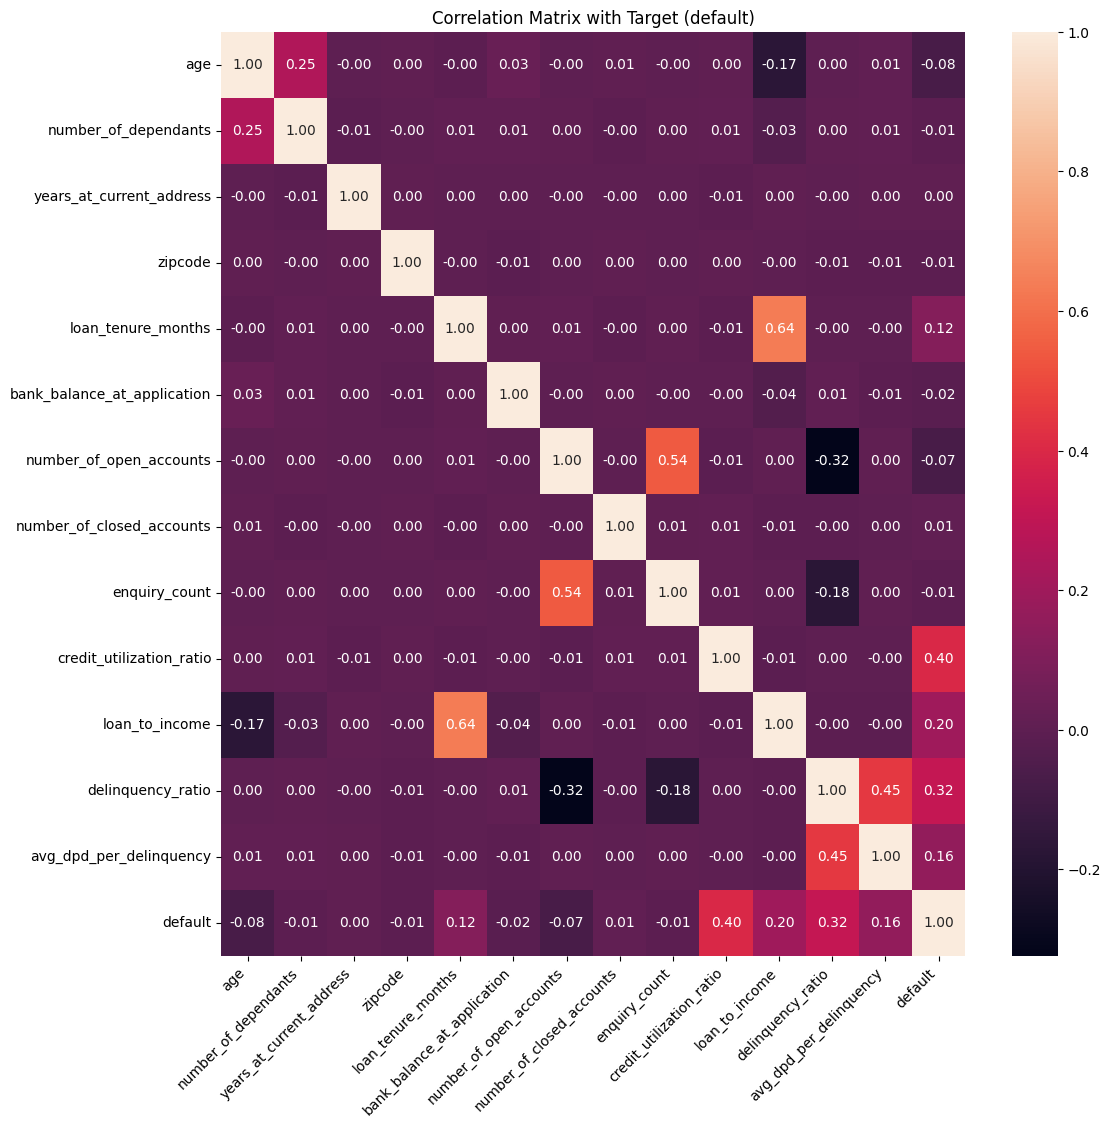

In [171]:
cols = list(numeric_columns.columns) + ['default']

# Step 3: Create correlation matrix
cm = df_train_3[cols].corr()

# Step 4: Plot heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, fmt='.2f')  # No cmap => default color
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix with Target (default)")
plt.show()

In [172]:
categorical_cols

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [173]:
temp = pd.concat([X_train_1, y_train], axis=1)
temp.groupby('loan_purpose')['default'].agg(['count', 'sum'])

,count,sum
loan_purpose,,
Auto,7447,327
Education,5620,559
Home,11304,1734
Personal,13117,603


In [174]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count', 'sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad'] = grouped['total'] - grouped['good']

    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()

    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad

    # Add epsilon to avoid division by zero or log(0)
    epsilon = 1e-6
    grouped['woe'] = round(np.log((grouped['good_pct'] + epsilon) / (grouped['bad_pct'] + epsilon)),2)
    grouped['iv'] = round((grouped['good_pct'] - grouped['bad_pct']) * grouped['woe'],2)
    return grouped

calculate_woe_iv(pd.concat([X_train_1, y_train], axis=1), 'loan_purpose', 'default')


,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.101458,0.207792,-0.72,0.08
Education,5620,559,5061,0.173441,0.147702,0.16,0.00
Home,11304,1734,9570,0.538008,0.279294,0.66,0.17
Personal,13117,603,12514,0.187093,0.365212,-0.67,0.12


In [175]:
iv_values = {}

for feature in X_train_1.columns:
    df_combined = pd.concat([X_train_1[feature], y_train], axis=1)
    
    if X_train_1[feature].dtype == 'object':
        result_df = calculate_woe_iv(df_combined, feature, 'default')
    
    else:
        # Bin numeric features into 10 equal-width bins with no labels
        df_combined[feature] = pd.cut(X_train_1[feature], bins=10, labels=False)
        result_df = calculate_woe_iv(df_combined, feature, 'default')
    
    iv = result_df['iv'].sum()
    iv_values[feature] = iv

iv_values


{'age': np.float64(0.07999999999999999),
 'gender': np.float64(0.0),
 'marital_status': np.float64(0.0),
 'employment_status': np.float64(0.0),
 'number_of_dependants': np.float64(0.0),
 'residence_type': np.float64(0.24000000000000002),
 'years_at_current_address': np.float64(0.0),
 'city': np.float64(0.0),
 'state': np.float64(0.0),
 'zipcode': np.float64(0.0),
 'loan_purpose': np.float64(0.37),
 'loan_type': np.float64(0.16),
 'loan_tenure_months': np.float64(0.21),
 'bank_balance_at_application': np.float64(0.0),
 'number_of_open_accounts': np.float64(0.07999999999999999),
 'number_of_closed_accounts': np.float64(0.0),
 'enquiry_count': np.float64(0.0),
 'credit_utilization_ratio': np.float64(2.3500000000000005),
 'loan_to_income': np.float64(0.48000000000000004),
 'delinquency_ratio': np.float64(0.73),
 'avg_dpd_per_delinquency': np.float64(0.4)}

In [176]:
iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.35
19,delinquency_ratio,0.73
18,loan_to_income,0.48
20,avg_dpd_per_delinquency,0.40
10,loan_purpose,0.37
5,residence_type,0.24
12,loan_tenure_months,0.21
11,loan_type,0.16
14,number_of_open_accounts,0.08
0,age,0.08


In [177]:
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

### Feature Encoding

In [178]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [179]:
X_train_reduced.head(3)

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.788462,Owned,Home,Secured,0.415094,1.000000,0.363636,0.414520,0.1316,0.59
32495,0.500000,Owned,Education,Secured,0.830189,0.666667,0.050505,0.306792,0.0625,0.62
43675,0.384615,Mortgage,Home,Secured,0.490566,0.000000,0.000000,0.758782,0.2222,0.56


In [180]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)

In [181]:
X_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788462,0.415094,1.000000,0.363636,0.414520,0.1316,0.59,True,False,False,True,False,False
32495,0.500000,0.830189,0.666667,0.050505,0.306792,0.0625,0.62,True,False,True,False,False,False
43675,0.384615,0.490566,0.000000,0.000000,0.758782,0.2222,0.56,False,False,False,True,False,False


<h3 align="center" style="color:blue">Model Training </h3>

Attempt the Model Training using:
1. Model Training Using LogisticRegression, Randomclassifier, XGB Boost
2. Class Imbalance


In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.71      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [183]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.71      0.77      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [184]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.81      0.75      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.87      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [185]:
from sklearn.model_selection import RandomizedSearchCV
# Define model
model = LogisticRegression(max_iter=1000)

# Define parameter grid
param_grid = {
    'C': np.linspace(-4, 20, 10),  # You may want to use log scale or filter negatives (see note below)
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']
}

# NOTE: C must be positive. If you're trying -4, 4, 20, then -4 is invalid.
param_grid['C'] = [c for c in param_grid['C'] if c > 0]

# RandomizedSearchCV
search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
search.fit(X_train_encoded, y_train)

# Predict and print report
y_pred = search.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

# Best parameters
print("Best Parameters:", search.best_params_)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.84      0.73      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497

Best Parameters: {'solver': 'lbfgs', 'C': np.float64(17.333333333333332)}


In [186]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization
}

# Model
xgb = XGBClassifier()

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=100,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit model
random_search.fit(X_train_encoded, y_train)

# Best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

# Predict and evaluate
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7895728146092874
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.78      0.83      0.80      1074

    accuracy                           0.97     12497
   macro avg       0.88      0.90      0.89     12497
weighted avg       0.97      0.97      0.97     12497



Attempt 2 
1. LogisticRegression, XGB Boost
2. Handle class Imabalnce with Under Sampling

In [187]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_encoded, y_train) 
y_train_rus.value_counts() 

default
0    3223
1    3223
Name: count, dtype: int64

In [188]:
model = LogisticRegression()
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.95      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [189]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.98      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.95      0.81     12497
weighted avg       0.96      0.92      0.93     12497



Attempt 3

1. Logistic Ragression
2. Handle Class indiance Using SMOTE Tomek
3. Parameter tunneng using optuna

In [190]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)

# Check class balance after resampling
y_train_smt.value_counts()

default
0    34194
1    34194
Name: count, dtype: int64

In [191]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [192]:
pip install optuna

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [193]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [194]:
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'saga', 'liblinear', 'newton-cg']),
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])
    }
    model = LogisticRegression(**param, max_iter=10000)

    scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=scorer, n_jobs=1)

    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-08-08 12:53:54,045] A new study created in memory with name: no-name-84becaa2-81e3-4fac-9db3-807e8908377e
[I 2025-08-08 12:53:54,748] Trial 0 finished with value: 0.9456777552780045 and parameters: {'C': 2685.042027822611, 'solver': 'saga', 'tol': 0.0006243518840088958, 'class_weight': None}. Best is trial 0 with value: 0.9456777552780045.
[I 2025-08-08 12:53:55,482] Trial 1 finished with value: 0.9457069904824748 and parameters: {'C': 594.8289141960674, 'solver': 'newton-cg', 'tol': 2.5060015662554628e-05, 'class_weight': None}. Best is trial 1 with value: 0.9457069904824748.
[I 2025-08-08 12:53:56,391] Trial 2 finished with value: 0.8969716878709978 and parameters: {'C': 0.0008067992806659588, 'solver': 'saga', 'tol': 0.0011276527182855953, 'class_weight': None}. Best is trial 1 with value: 0.9457069904824748.
[I 2025-08-08 12:53:56,884] Trial 3 finished with value: 0.9452479719519925 and parameters: {'C': 0.5732950466972728, 'solver': 'lbfgs', 'tol': 0.00027011734601781857, 

In [195]:
print('Best Trial:')
trial = study_logistic.best_trial
print('F1-score: {}'.format(trial.value))
print('Params: ')
for key, value in trial.params.items():
    print(f'   {key}: {value}')

# Train model with best parameters
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Predictions and evaluation
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

Best Trial:
F1-score: 0.9459253357332167
Params: 
   C: 3.64671159797744
   solver: saga
   tol: 0.002753550767771934
   class_weight: balanced
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



Attempt 4
1. XGBoost
2. Handle Class Imbalace using SMOTE Tomek
3. Parameter tunning using optuna 

In [196]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)

    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)


[I 2025-08-08 12:54:25,093] A new study created in memory with name: no-name-16a7b953-d592-437b-ad69-9958a8ce4a8f
[I 2025-08-08 12:54:27,023] Trial 0 finished with value: 0.9677205164275096 and parameters: {'lambda': 2.1115742983021195, 'alpha': 0.0013557135481285568, 'subsample': 0.6801162250221877, 'colsample_bytree': 0.4089023510407071, 'max_depth': 10, 'eta': 0.2818444213198456, 'gamma': 4.0984941255459955, 'scale_pos_weight': 5.251173337833109, 'min_child_weight': 6, 'max_delta_step': 1}. Best is trial 0 with value: 0.9677205164275096.
[I 2025-08-08 12:54:28,517] Trial 1 finished with value: 0.967842143850094 and parameters: {'lambda': 0.004619904793301608, 'alpha': 7.9911221969974715, 'subsample': 0.7055049698739022, 'colsample_bytree': 0.9816941154920702, 'max_depth': 10, 'eta': 0.19039842059695952, 'gamma': 8.143694133887102, 'scale_pos_weight': 1.7276188210234293, 'min_child_weight': 1, 'max_delta_step': 4}. Best is trial 1 with value: 0.967842143850094.
[I 2025-08-08 12:54:31

In [197]:
print('Best Trial:')
trial = study_xgb.best_trial
print('F1-score: {}'.format(trial.value))
print('Params: ')
for key, value in trial.params.items():
    print(f'   {key}: {value}')

# Train model with best parameters
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Predictions and evaluation
y_pred = best_model_xgb.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)


Best Trial:
F1-score: 0.9459253357332167
Params: 
   C: 3.64671159797744
   solver: saga
   tol: 0.002753550767771934
   class_weight: balanced
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11423
           1       0.73      0.84      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.86      0.90      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [198]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [199]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

fpr,tpr, thresholds = roc_curve(y_test, probabilities)
fpr[:10], tpr[:10], thresholds[:10]

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.75426771e-05,
        8.75426771e-05, 1.75085354e-04, 1.75085354e-04, 2.62628031e-04,
        2.62628031e-04, 3.50170708e-04]),
 array([0.        , 0.0009311 , 0.16201117, 0.16201117, 0.17690875,
        0.17690875, 0.2141527 , 0.2141527 , 0.22718808, 0.22718808]),
 array([       inf, 1.        , 0.99941268, 0.99940788, 0.99928208,
        0.99926798, 0.99874301, 0.99873433, 0.99851772, 0.99845165]))

In [200]:
from sklearn.metrics import auc 

area = auc(fpr, tpr)
area

np.float64(0.9836467181847987)

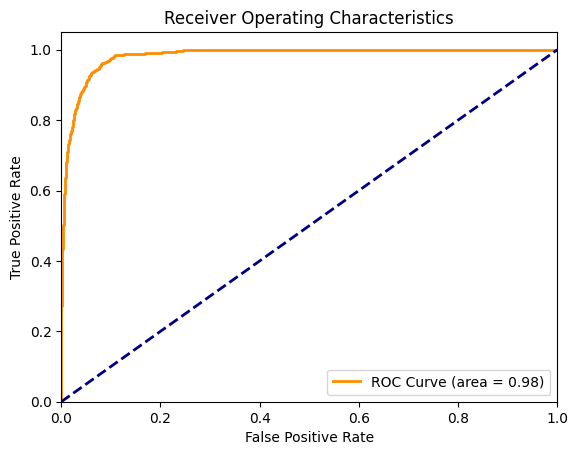

In [202]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (area = %0.2f)' %area)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

### Model Evaluation: Rankorder & KS Statistics

In [206]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
probabilities

array([5.21981103e-01, 1.12805372e-05, 5.50306825e-03, ...,
       2.40755295e-03, 8.27116899e-01, 5.87766686e-01], shape=(12497,))

In [207]:
df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(5)

,Default Truth,Default Probability
19205,0,0.521981
15514,0,0.000011
30367,0,0.005503
35347,0,0.006129
41814,1,0.918523


In [214]:
df_eval['decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(5)

,Default Truth,Default Probability,decile,Decile
19205,0,0.521981,8,8
15514,0,0.000011,2,2
30367,0,0.005503,6,6
35347,0,0.006129,6,6
41814,1,0.918523,9,9


In [237]:
df_grouped = df_eval.groupby('Decile')[['Default Probability', 'Default Truth']].apply(
    lambda x: pd.Series({
        'Minimum Probability': round(x['Default Probability'].min(), 3),
        'Maximum Probability': round(x['Default Probability'].max(), 3),
        'Events': x['Default Truth'].sum(),
        'Non-Events': x['Default Truth'].count() - x['Default Truth'].sum()
    })
).reset_index()

In [238]:
df_grouped.head(10)

,Decile,Minimum Probability,Maximum Probability,Events,Non-Events
0,0,0.000,0.000,0.0,1250.0
1,1,0.000,0.000,0.0,1250.0
2,2,0.000,0.000,0.0,1249.0
3,3,0.000,0.000,0.0,1250.0
4,4,0.000,0.001,0.0,1250.0
5,5,0.001,0.004,0.0,1249.0
6,6,0.004,0.028,5.0,1245.0
7,7,0.028,0.208,10.0,1239.0
8,8,0.208,0.815,162.0,1088.0
9,9,0.815,1.000,897.0,353.0


In [250]:
df_grouped['Event Rate'] =  df_grouped ['Events']*100/ (df_grouped['Events']+df_grouped ['Non-Events'])
df_grouped['Non-Event Rate'] = df_grouped['Non-Events']*100/ (df_grouped['Events']+df_grouped['Non-Events'])
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-Events,Event Rate,Non-Event Rate,Event/Non-Event Ratio,Non-event Rate
0,9,0.815,1.000,897.0,28.240000,96.947819,3.052181,27.033817,3.052181
1,8,0.208,0.815,162.0,87.040000,65.049791,34.950209,1.584075,34.950209
2,7,0.028,0.208,10.0,99.199359,9.157563,90.842437,0.085797,90.842437
3,6,0.004,0.028,5.0,99.600000,4.780115,95.219885,0.042726,95.219885
4,5,0.001,0.004,0.0,100.000000,0.000000,100.000000,0.000000,100.000000
5,4,0.000,0.001,0.0,100.000000,0.000000,100.000000,0.000000,100.000000
6,3,0.000,0.000,0.0,100.000000,0.000000,100.000000,0.000000,100.000000
7,2,0.000,0.000,0.0,100.000000,0.000000,100.000000,0.000000,100.000000
8,1,0.000,0.000,0.0,100.000000,0.000000,100.000000,0.000000,100.000000
9,0,0.000,0.000,0.0,100.000000,0.000000,100.000000,0.000000,100.000000


In [251]:
df_grouped = df_grouped.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-Events,Event Rate,Non-Event Rate,Event/Non-Event Ratio,Non-event Rate
0,9,0.815,1.000,897.0,28.240000,96.947819,3.052181,27.033817,3.052181
1,8,0.208,0.815,162.0,87.040000,65.049791,34.950209,1.584075,34.950209
2,7,0.028,0.208,10.0,99.199359,9.157563,90.842437,0.085797,90.842437
3,6,0.004,0.028,5.0,99.600000,4.780115,95.219885,0.042726,95.219885
4,5,0.001,0.004,0.0,100.000000,0.000000,100.000000,0.000000,100.000000
5,4,0.000,0.001,0.0,100.000000,0.000000,100.000000,0.000000,100.000000
6,3,0.000,0.000,0.0,100.000000,0.000000,100.000000,0.000000,100.000000
7,2,0.000,0.000,0.0,100.000000,0.000000,100.000000,0.000000,100.000000
8,1,0.000,0.000,0.0,100.000000,0.000000,100.000000,0.000000,100.000000
9,0,0.000,0.000,0.0,100.000000,0.000000,100.000000,0.000000,100.000000


In [256]:
# Model Evaluation: Rank Ordering & KS Statistics

# Step 1: Get predictions on test set
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

In [260]:
df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(5)

,Default Truth,Default Probability
19205,0,0.521981
15514,0,0.000011
30367,0,0.005503
35347,0,0.006129
41814,1,0.918523


In [261]:
df_eval['decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=range(0,10), duplicates='drop')

# Display initial data
print("Initial evaluation data:")
print(df_eval.head())

Initial evaluation data:
       Default Truth  Default Probability decile
19205              0             0.521981      8
15514              0             0.000011      2
30367              0             0.005503      6
35347              0             0.006129      6
41814              1             0.918523      9


In [263]:
df_grouped['Non-Events'] = df_grouped['Total'] - df_grouped['Events']

In [265]:
df_grouped['Event Rate'] = df_grouped['Events'] / df_grouped['Total'] * 100
df_grouped['Non-Event Rate'] = df_grouped['Non-Events'] / df_grouped['Total'] * 100
df_grouped.head(5)

,Decile,Minimum Probability,Maximum Probability,Events,Total,Non-Events,Event Rate,Non-Event Rate
0,0,1.289284e-09,7.595025e-07,0,1250,1250,0.0,100.0
1,1,7.602626e-07,5.910899e-06,0,1250,1250,0.0,100.0
2,2,5.917165e-06,2.963604e-05,0,1249,1249,0.0,100.0
3,3,2.963853e-05,1.479367e-04,0,1250,1250,0.0,100.0
4,4,1.481937e-04,7.446134e-04,0,1250,1250,0.0,100.0


In [267]:
df_grouped = df_grouped.sort_values('Decile', ascending=False).reset_index(drop=True)

# Calculate cumulative statistics (from highest to lowest risk)
df_grouped['Cumulative Events'] = df_grouped['Events'].cumsum()
df_grouped['Cumulative Non-Events'] = df_grouped['Non-Events'].cumsum()

# Reorder columns: Decile, Min/Max Prob, Events, Non-Events, Cumulative Events, Cumulative Non-Events, Cumulative Rates, KS
df_grouped = df_grouped[['Decile', 'Minimum Probability', 'Maximum Probability', 'Events', 'Non-Events']]

# Add cumulative columns
df_grouped['Cumulative Events'] = df_grouped['Events'].cumsum()  
df_grouped['Cumulative Non-Events'] = df_grouped['Non-Events'].cumsum()

# Calculate KS Statistics
total_events = df_grouped['Events'].sum()
total_non_events = df_grouped['Non-Events'].sum()

df_grouped['% Events'] = df_grouped['Cumulative Events'] / total_events * 100
df_grouped['% Non-Events'] = df_grouped['Cumulative Non-Events'] / total_non_events * 100
df_grouped['KS'] = abs(df_grouped['% Events'] - df_grouped['% Non-Events'])

# Display final results with better formatting
print("\nFinal Rank Ordering Table:")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.precision', 4)
print(df_grouped.round(4))
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.precision')

# Additional check for decile 9 (Highest Risk - highest probabilities)
print("\nDecile 9 (Highest Risk) Specific Details:")
decile_9 = df_grouped[df_grouped['Decile'] == 9]
if not decile_9.empty:
    print(f"Events: {decile_9['Events'].iloc[0]}")
    print(f"Non-Events: {decile_9['Non-Events'].iloc[0]}")
    print(f"Min Probability: {decile_9['Minimum Probability'].iloc[0]:.6f}")
    print(f"Max Probability: {decile_9['Maximum Probability'].iloc[0]:.6f}")
    print(f"Should be around 0.82 to 1.00 range")



Final Rank Ordering Table:
  Decile  Minimum Probability  Maximum Probability  Events  Non-Events  \
0      9               0.8151               1.0000     897         353   
1      8               0.2080               0.8149     162        1088   
2      7               0.0280               0.2078      10        1239   
3      6               0.0042               0.0279       5        1245   
4      5               0.0007               0.0042       0        1249   
5      4               0.0001               0.0007       0        1250   
6      3               0.0000               0.0001       0        1250   
7      2               0.0000               0.0000       0        1249   
8      1               0.0000               0.0000       0        1250   
9      0               0.0000               0.0000       0        1250   

   Cumulative Events  Cumulative Non-Events  % Events  % Non-Events       KS  
0                897                    353   83.5196        3.0903  80.4293  

In [268]:
max_ks = df_grouped['KS'].max()
max_ks_decile = df_grouped[df_grouped['KS'] == max_ks]['Decile'].iloc[0]

print(f"\nMaximum KS Statistic: {max_ks:.4f}")
print(f"Occurs at Decile: {max_ks_decile}")


Maximum KS Statistic: 85.9885
Occurs at Decile: 8


### Finalized The Model 

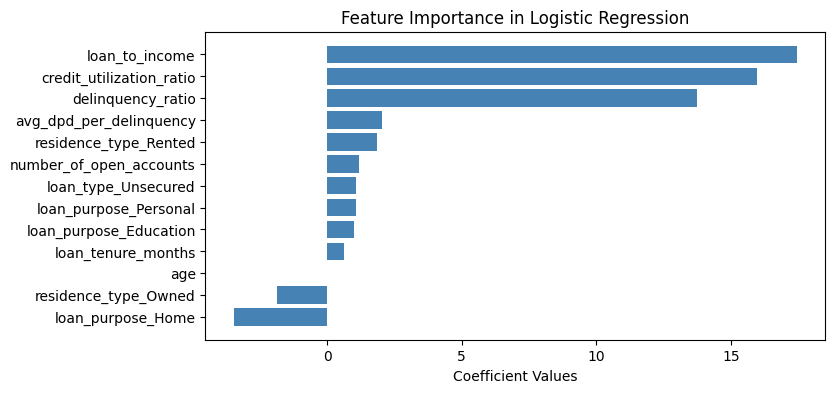

In [277]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Values')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Save the Model

In [269]:
X_test_encoded.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346154,0.754717,0.333333,0.989899,0.547786,0.0,0.0,True,False,False,True,False,False
15514,0.480769,0.226415,1.000000,0.323232,0.219114,0.0,0.0,True,False,True,False,False,False


In [270]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [271]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [273]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [279]:
from joblib import dump 

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'artifacts/model_data.joblib')


['artifacts/model_data.joblib']

In [280]:
final_model.coef_, final_model.intercept_

(array([[-1.61544993e-02,  6.33914510e-01,  1.17086177e+00,
          1.59774992e+01,  1.74679556e+01,  1.37429300e+01,
          2.02328452e+00, -1.85298487e+00,  1.84688237e+00,
          9.98833902e-01, -3.47014521e+00,  1.07278557e+00,
          1.07278557e+00]]),
 array([-20.83681406]))

In [283]:
gini_coefficient = 2*area-1

print('AUC:', area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9836467181847987
Gini Coefficient: 0.9672934363695973
